In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import os

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
os.listdir("/content/drive/MyDrive/fakenews")

['LabeledAuthentic-7K.csv', 'LabeledFake-1K.csv']

In [8]:
dataframe1 = pd.read_csv('/content/drive/MyDrive/fakenews/LabeledAuthentic-7K.csv')

In [9]:
dataframe2 = pd.read_csv('/content/drive/MyDrive/fakenews/LabeledFake-1K.csv')

In [10]:
dataframe2.head()

,articleID,domain,date,category,source,relation,headline,content,label,F-type
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,Reporter,Unrelated,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,Satire
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,Reporter,Unrelated,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,Satire
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,Reporter,Unrelated,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,Satire
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,Reporter,Unrelated,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,Satire
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,Reporter,Unrelated,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,Satire


In [11]:
dataframe2=dataframe2.drop(['F-type'], axis=1)

In [12]:
df = dataframe2.append(dataframe1)

In [13]:
df.head()

,articleID,domain,date,category,source,relation,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,Reporter,Unrelated,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0.0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,Reporter,Unrelated,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0.0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,Reporter,Unrelated,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0.0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,Reporter,Unrelated,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0.0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,Reporter,Unrelated,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0.0


In [ ]:
df.content[0]

0    বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্গা দেওয়া। প্রবাদটা এজন্য বলা হয় যে, শিয়ালের কাজই হলো মুরগী খেয়ে ফেলা। শেয়ালের কাছ থেকে মুরগী কখনো নিজেকে রক্ষা করতে পারেনা।তবে ফ্রান্সের এক বিশ্ববিদ্যালয়ের শিক্ষক-শিক্ষার্থীরা জানাচ্ছে, এবার এক আশ্চর্য্যজনক ঘটনা ঘটছে। মুরগীর হামলায় শিয়াল মারা গেছে।ঘটনাটি গত সপ্তাহের, ফ্রান্সের উত্তর-পূর্বাঞ্চলের বুতানিয়া এলাকার একটি কৃষিবিষয়ক বিদ্যালয়ে। ওই বিদ্যালয়ে একটি মুরগির খামার রয়েছে। মুরগির ঘরের এক কোনায় সকালে মৃত একটি শিয়াল পড়ে থাকতে দেখে শিক্ষার্থীরা।৬ হাজার মুরগি রয়েছে খামারটিতে। শিয়ালটির মৃতদেহ যেখানে পাওয়া গেছে, সেখানে তিন হাজার মুরগি ছিল। মুরগিগুলো সারা দিন বাইরে চরে বেড়ায়। সন্ধ্যা হলে নিজ থেকে ঘরে উঠে আসে। সূর্য ডুবে গেলেই দরজা বন্ধ হয়ে যায় স্বয়ংক্রিয়ভাবে।স্থানীয় বন্য প্রাণী বিশেষজ্ঞরা জানিয়েছেন, এই ঘটনায় তাঁরা অবাক। শিয়ালটি বাচ্চা ও অনভিজ্ঞ ছিল। এতগুলো মুরগির সামনে পড়ে সে সম্ভবত ভড়কে গিয়েছিল।Source- BBC Bangla
0                                                                                                                        ক্রিকেট 

In [ ]:
#pd.set_option('display.max_colwidth',None)
#print(df['content'][2])

2    অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরকম শূন্যতা। বাবা-মায়ের সাথে থেকেও আজকালকার ছেলেমেয়েরা যেমন একাকীত্বে ভোগে, তেমনি সবকিছু দ্বারা বেষ্টিত থাকলেও বর্তমান সরকারের পাশে 'কী যেন নেই! কী যেন নেই!'প্রচন্ড অনিচ্ছায় জাতীয়পার্টি বিরোধীদলের চেয়ারে বসলেও, তারা ঠিক যেন বিরোধীদল নয়। অনেকটা বিরোধীদলের রেপ্লিকার মত। এমতাবস্থায় সরকারকে বিরোধীদল আমদানির পরামর্শ দিয়েছেন অনলাইন রাজনীতি বিশেষজ্ঞরা।নাম প্রকাশে অনিচ্ছুক জনৈক বিরোধীদল বিশেষজ্ঞ আমাদের বলেন, 'বর্তমান সরকারের এখন একটা জিনিসেরই অভাব, আর সেটা হল উন্নতমানের বিরোধীদল। অতিসত্ত্বর এ ব্যাপারে পদক্ষেপ নেয়া উচিত। দেশে না পাওয়া গেলে বিদেশ থেকে উন্নতমানের বিরোধীদল আনাতে হবে।''আলীবাবা' অথবা 'অ্যামাজন' থেকে অর্ডার করে বিরোধীদল আনানো ঠিক হবে কিনা এমন প্রশ্নে ওই বিশেষজ্ঞ চোখ কপালে তুলে বলেন, 'এটা মোটেই ঠিক হবে না৷ অনলাইনে অর্ডার করলে কখনোই ভাল মাল পাওয়া যায় না।' জাতীয়পার্টিকে অনলাইনে অর্ডার করে আনানো হয়েছে, এমন ধারণাও তিনি পোষণ করেন।বর্তমান বিরোধীদলকে 'মেড ইন চায়না' উল্লেখ করে তিনি আরো বলেন, 'চায়না হ্যান্ডসেটের মত এদেরকেও স্পিকারে সাউন্ড বেশি। 

In [14]:
df['word_counts'] = df['content'].apply(lambda x: len(x.split()))

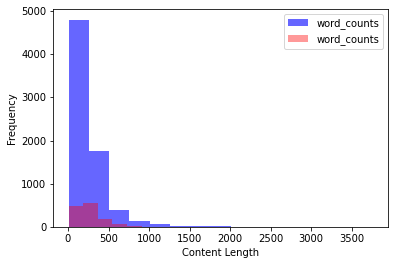

In [15]:
#plt.figure(figsize=(12, 8))

df[df.label == 1].word_counts.plot(kind='hist', color='blue', 
                                       Label=' Hate',bins=15, alpha=0.6)
df[df.label==0].word_counts.plot(bins=15, kind='hist', color='red', 
                                       Label='Non Hate', alpha=0.4)

plt.legend()
plt.xlabel("Content Length")
plt.show()

In [16]:
def clean_text(df):
    all_comments = list()
    lines = df.content.values.tolist()
    for text in lines:

        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        # removing #mentions
        text = re.sub(r"@+","", text)
        
        text = re.sub(r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।ঃ\t\n]", "", text) # removing punctuations
        tokens = word_tokenize(text)
        
        stop_words = set(stopwords.words("bengali"))
        words = [w for w in tokens if not w in stop_words] # removing stop words

        words = ' '.join(words)
        all_comments.append(words)
        
    return all_comments

all_comments = clean_text(df)

In [17]:
df['process_speech'] = all_comments

In [18]:
df.isnull().sum()

articleID         0
domain            0
date              0
category          0
source            0
relation          0
headline          0
content           0
label             0
word_counts       0
process_speech    0
dtype: int64

In [19]:
X = df.process_speech
Y = df.label.values

In [20]:
X.shape[0]

8501

In [21]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(min_df=5, ngram_range=(1,2))
X = tfidf_v.fit_transform(X).toarray()

In [22]:
validation_split = 0.3

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

num_validation_samples = int(validation_split * X.shape[0]) # 0.3 * 300

X_train = X[:-num_validation_samples]
y_train = Y[:-num_validation_samples]
X_test = X[-num_validation_samples:]
y_test = Y[-num_validation_samples:]

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import string

Random Forest

In [ ]:
rf_model= RandomForestClassifier(n_estimators = 100)  
rf_model.fit(X_train, y_train)  
rf_train = rf_model.score(X_train,y_train)
print('Training Accuracy:',rf_train)

Training Accuracy: 1.0


In [ ]:
rf_test = rf_model.score(X_test,y_test)
print('Testing Accuracy:', rf_test)

Testing Accuracy: 0.9050980392156863


In [ ]:
rf_pred= rf_model.predict(X_test)

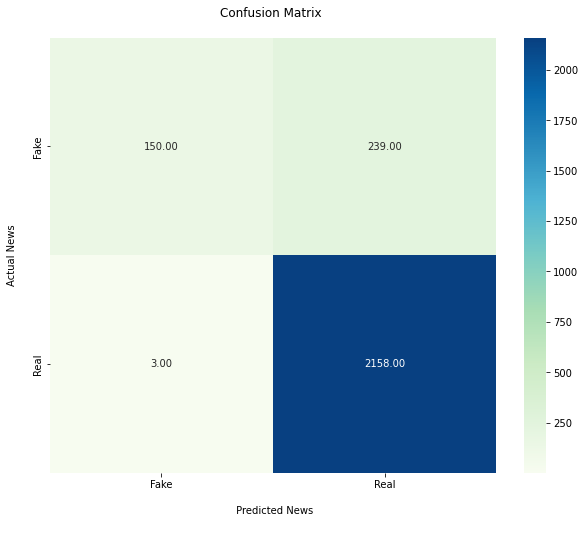

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,rf_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted News\n')
fx.set_ylabel('Actual News\n');
fx.xaxis.set_ticklabels(['Fake','Real'])
fx.yaxis.set_ticklabels(['Fake','Real'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, rf_pred, average='macro'))
print('Precision:',precision_score(y_test, rf_pred, average='macro'))
print('F1 score:', f1_score(y_test, rf_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, rf_pred))

recall: 0.6921079334641084
Precision: 0.9403420942845223
F1 score: 0.7502060365052972
Accuracy: 0.9050980392156863


Logistic Regression

In [24]:
lr_model= LogisticRegression(random_state=0)  
lr_model.fit(X_train, y_train)  
lr_train = lr_model.score(X_train,y_train)
print('Training Accuracy:',lr_train)

In [25]:
lr_test = lr_model.score(X_test,y_test)
print('Testing Accuracy:', lr_test)

Testing Accuracy: 0.9168627450980392


In [26]:
lr_pred= lr_model.predict(X_test)

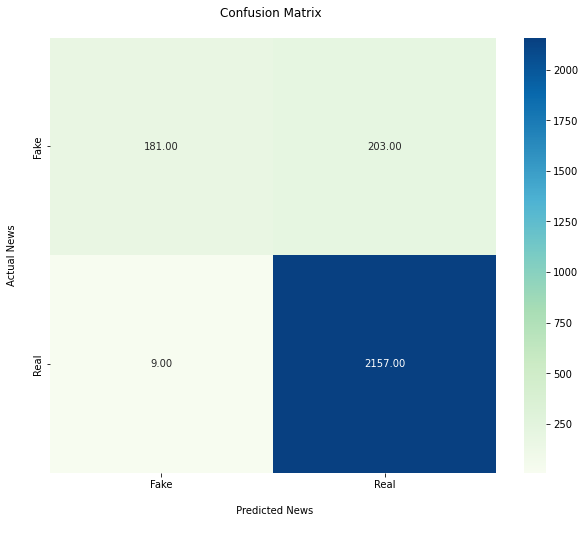

In [27]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,lr_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted News\n')
fx.set_ylabel('Actual News\n');
fx.xaxis.set_ticklabels(['Fake','Real'])
fx.yaxis.set_ticklabels(['Fake','Real'])
plt.show()
     

In [28]:
print('recall:',recall_score(y_test, lr_pred, average='macro'))
print('Precision:',precision_score(y_test, lr_pred, average='macro'))
print('F1 score:', f1_score(y_test, lr_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, lr_pred))

recall: 0.7335995210064635
Precision: 0.933307314897413
F1 score: 0.7919107718316626
Accuracy: 0.9168627450980392


KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn_model.fit(X_train,y_train)
knn_train = knn_model.score(X_train,y_train)
print('Training Accuracy:')
print(knn_train)

Training Accuracy:
0.9561418249033776


In [ ]:
knn_test = knn_model.score(X_test,y_test)
print('Testing Accuracy:')
print(knn_test)

Testing Accuracy:
0.9094117647058824


In [ ]:
k_pred= knn_model.predict(X_test)

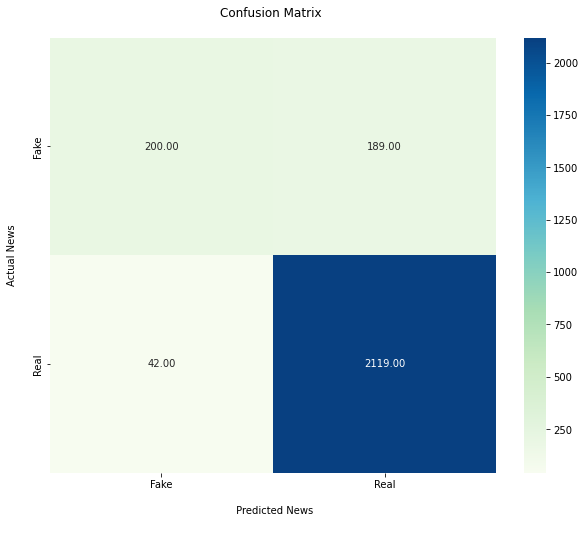

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,k_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted News\n')
fx.set_ylabel('Actual News\n');
fx.xaxis.set_ticklabels(['Fake','Real'])
fx.yaxis.set_ticklabels(['Fake','Real'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, k_pred, average='macro'))
print('Precision:',precision_score(y_test, k_pred, average='macro'))
print('F1 score:', f1_score(y_test, k_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, k_pred))

recall: 0.7473516854640989
Precision: 0.8722785997679648
F1 score: 0.7911125027881809
Accuracy: 0.9094117647058824


Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)  
dt_train = dt_model.score(X_train,y_train)
print('Training Accuracy:',dt_train)

Training Accuracy: 1.0


In [ ]:
dt_test = dt_model.score(X_test,y_test)
print('Testing Accuracy:', dt_test)

Testing Accuracy: 0.8854901960784314


In [ ]:
dt_pred= dt_model.predict(X_test)


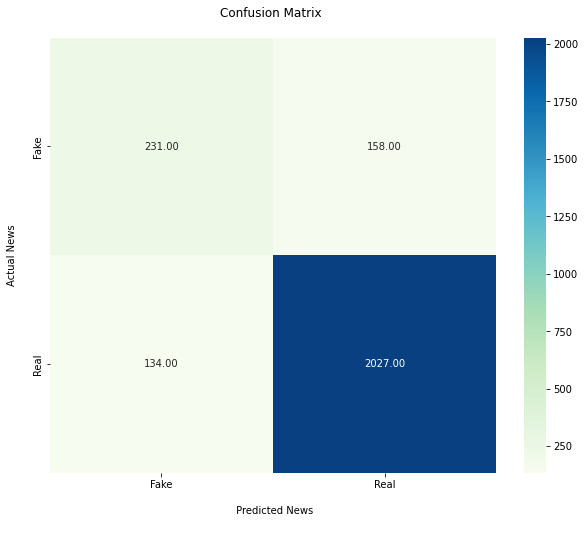

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,dt_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted News\n')
fx.set_ylabel('Actual News\n');
fx.xaxis.set_ticklabels(['Fake','Real'])
fx.yaxis.set_ticklabels(['Fake','Real'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, dt_pred, average='macro'))
print('Precision:',precision_score(y_test, dt_pred, average='macro'))
print('F1 score:', f1_score(y_test, dt_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, dt_pred))

recall: 0.7659110023565687
Precision: 0.7802827497570609
F1 score: 0.7727719382193572
Accuracy: 0.8854901960784314


In [ ]:
def check(): 
    input_content = input('Enter News: ')
    
    clean_content = input_content.translate(str.maketrans('', '', string.punctuation))
    transform_text = tfidf_v.transform([clean_content])
    pred = lr_model.predict(transform_text)

    if(pred[0] == 0):
      print('Fake')
    else:
      print('Real')


In [ ]:
check()

Enter News: বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্গা দেওয়া
Real
